# Load packages 

In [1]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

#intergrated in geopandas
#from geofeather.pygeos import to_geofeather, from_geofeather
import pandas as pd
import geopandas as gpd
#integreta in shapely
#import pygeos
from rasterstats import zonal_stats
from scipy.stats import spearmanr
import shapely


from shapely.geometry import mapping, shape
import shapely.wkb

# Load data

In [3]:
# Set paths
# cisi_index_path = 'data/cisi/CISI/025_degree/CISI_europe.feather'
cisi_index_clip_path = 'data/output/resample/clipped_cisi_index.feather'
world_pop_2010 = "data/output/resample/clipped_pop_2010.tif"
world_pop_2100 = "data/output/resample/clipped_pop_2100.tif"

# Read data CISI index
# cisi_index = pd.read_feather(cisi_index_path)
cisi_index_clip = pd.read_feather(cisi_index_clip_path)
cisi_index_clip.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'data/output/resample/clipped_cisi_index.feather'

In [4]:
# Read data CISI absolute value

# glob list files in folder ending with .feather
cisi_absolute_value_folder = "data/output/resample"
cisi_absolute_value_file_paths = [os.path.join(cisi_absolute_value_folder, f) for f in os.listdir(cisi_absolute_value_folder) if f.endswith('.feather')]
cisi_absolute_value_file_names = [os.path.basename(f) for f in cisi_absolute_value_file_paths]

for file_path, file_name in zip(cisi_absolute_value_file_paths, cisi_absolute_value_file_names):
    if 'education' in file_name:
        cisi_abs_val_education = pd.read_feather(file_path)
        print("Education DataFrame:")
        print(cisi_abs_val_education.head(2))
    elif 'healthcare' in file_name:
        cisi_abs_val_health = pd.read_feather(file_path)
        print("Healthcare DataFrame:")
        print(cisi_abs_val_health.head(2))
    elif 'energy' in file_name:
        cisi_abs_val_energy = pd.read_feather(file_path)
        print("Energy DataFrame:")
        print(cisi_abs_val_energy.head(2))
    elif 'water' in file_name:
        cisi_abs_val_water = pd.read_feather(file_path)
        print("Water DataFrame:")
        print(cisi_abs_val_water.head(2))
    elif 'waste' in file_name:
        cisi_abs_val_waste = pd.read_feather(file_path)
        print("Waste DataFrame:")
        print(cisi_abs_val_waste.head(2))
    elif 'transport' in file_name:
        cisi_abs_val_transport = pd.read_feather(file_path)
        print("Transport DataFrame:")
        print(cisi_abs_val_transport.head(2))
    elif 'telecommunication' in file_name:
        cisi_abs_val_telecom = pd.read_feather(file_path)
        print("Telecommunication DataFrame:")
        print(cisi_abs_val_telecom.head(2))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/output/resample'

# Aggregate GDP and population data per grid cell

In [ ]:
# Create shapely geometries from WKB [store data] for operation
# explain: https://gis.stackexchange.com/questions/352961/how-to-convert-wkb-to-shapely-geometry
# cisi_index.geometry = shapely.from_wkb(cisi_index.geometry)
# cisi_index = gpd.GeoDataFrame(cisi_index.copy())

cisi_index_clip.geometry = shapely.from_wkb(cisi_index_clip.geometry)
cisi_index_clip = gpd.GeoDataFrame(cisi_index_clip.copy())

In [ ]:
def value_zonal_stat(x,world_grid):
    try:
        return zonal_stats(x,world_grid,stats="sum")
    except:
        return [{'sum': 0}]

In [ ]:
# #calculate tot_gdp per CISI grid cell
# tqdm.pandas(desc='gdp')
# cisi_index['tot_gdp'] = cisi_index.geometry.progress_apply(lambda x: value_zonal_stat(x,world_gdp))
# cisi_index['tot_gdp'] = cisi_index['tot_gdp'].apply(lambda x: x[0]['sum']) 

In [ ]:
# #calculate total_pop_2010 per CISI grid cell
# tqdm.pandas(desc='pop')
# cisi_index['total_pop_2010'] = cisi_index.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010))
# cisi_index['total_pop_2010'] = cisi_index['total_pop_2010'].apply(lambda x: x[0]['sum']) 
# cisi_index.head(3)

#calculate total_pop_2010 per CISI grid cell
tqdm.pandas(desc='pop')
cisi_index_clip['total_pop_2010'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010))
cisi_index_clip['total_pop_2010'] = cisi_index_clip['total_pop_2010'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#calculate total_pop_2030 per CISI grid cell
tqdm.pandas(desc='pop')
cisi_index_clip['total_pop_2030'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2030))
cisi_index_clip['total_pop_2030'] = cisi_index_clip['total_pop_2030'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#calculate total_pop_2050 per CISI grid cell
tqdm.pandas(desc='pop')
cisi_index_clip['total_pop_2050'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2050))
cisi_index_clip['total_pop_2050'] = cisi_index_clip['total_pop_2050'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop')
cisi_index_clip['total_pop_2100'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100))
cisi_index_clip['total_pop_2100'] = cisi_index_clip['total_pop_2100'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)


pop: 100%|██████████| 15058/15058 [01:01<00:00, 245.99it/s]


,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry,total_pop_2010,total_pop_2100
0,0.009069,0.000976,0.005474,3.729865e-07,0.000049,0.000352,0.001150,0.001067,"POLYGON ((-17.00000 32.65833, -16.75000 32.658...",52254.0,69253.0
1,0.000032,0.000000,0.000032,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-17.25000 32.65833, -17.00000 32.658...",1158.0,1619.0
2,0.025802,0.001302,0.017946,1.107409e-04,0.000017,0.003582,0.001391,0.001453,"POLYGON ((-17.00000 32.90833, -16.75000 32.908...",128933.0,148689.0


In [8]:
# Make output folder if it does not exist

output_folder_corr = "data/output/corr"

if not os.path.exists(output_folder_corr):
    os.makedirs(output_folder_corr)

In [9]:
# Save new CISI with population and GDP
cisi_index_pop_path = os.path.join(output_folder_corr, 'CISI_exposure_clip_with_pop.feather')

# # Copy the GeoDataFrame
# cisi_index_pop = pd.DataFrame(cisi_index.copy())

# # Convert Shapely geometry objects to WKB
# cisi_index_pop.geometry = cisi_index_pop.geometry.apply(shapely.wkb.dumps)

# # Save to Feather format
# cisi_index_pop.to_feather('data/output/CISI_exposure_global_with_gdp_pop.feather')

# Copy the GeoDataFrame
cisi_index_pop = pd.DataFrame(cisi_index_clip.copy())

# Convert Shapely geometry objects to WKB
cisi_index_pop.geometry = cisi_index_pop.geometry.apply(shapely.wkb.dumps)

# Save to Feather format
cisi_index_pop.to_feather(cisi_index_pop_path)

# Calculate Spearmann Correlation

In [10]:
cisi_index_pop.columns

Index(['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
       'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare',
       'Subscore_education', 'geometry', 'total_pop_2010', 'total_pop_2100'],
      dtype='object')

In [11]:
# SpearmanrResult
spearmanr_cisi = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_energy = spearmanr(cisi_index_pop['Subscore_energy'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_transportation = spearmanr(cisi_index_pop['Subscore_transportation'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_water = spearmanr(cisi_index_pop['Subscore_water'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_waste = spearmanr(cisi_index_pop['Subscore_waste'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_telecommunication = spearmanr(cisi_index_pop['Subscore_telecommunication'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_healthcare = spearmanr(cisi_index_pop['Subscore_healthcare'],cisi_index_pop['total_pop_2010'],nan_policy='omit')
spearmanr_education = spearmanr(cisi_index_pop['Subscore_education'],cisi_index_pop['total_pop_2010'],nan_policy='omit') 
print('This is "CISI" vs "Population": {}'.format(spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_energy" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_energy'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_transportation" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_transportation'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Water" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_water'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_waste" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_waste'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_telecommunication" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_telecommunication'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_healthcare" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_healthcare'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))
print('This is "Subscore_education" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_education'],cisi_index_pop['total_pop_2010'],nan_policy='omit')))



This is "CISI" vs "Population": SignificanceResult(statistic=0.7921270227601876, pvalue=0.0)
This is "Subscore_energy" vs "Population": SignificanceResult(statistic=0.6897627978459564, pvalue=0.0)
This is "Subscore_transportation" vs "Population": SignificanceResult(statistic=0.8603887719563005, pvalue=0.0)
This is "Water" vs "Population": SignificanceResult(statistic=0.6270040340541834, pvalue=0.0)
This is "Subscore_waste" vs "Population": SignificanceResult(statistic=0.6017268549078755, pvalue=0.0)
This is "Subscore_telecommunication" vs "Population": SignificanceResult(statistic=0.527580663682138, pvalue=0.0)
This is "Subscore_healthcare" vs "Population": SignificanceResult(statistic=0.8109415313417031, pvalue=0.0)
This is "Subscore_education" vs "Population": SignificanceResult(statistic=0.7913680430307632, pvalue=0.0)


Text(0, 0.5, 'Spearman correlation coefficient per CI subsystem')

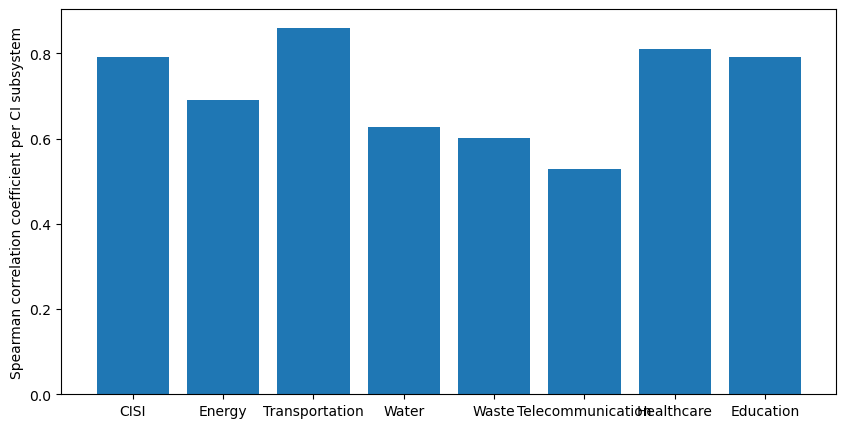

In [12]:
# Bar plot of the Spearman correlation coefficient
plt.figure(figsize=(10, 5))
plt.bar(['CISI','Energy','Transportation','Water','Waste','Telecommunication','Healthcare','Education'],
        [spearmanr_cisi[0], spearmanr_energy[0],spearmanr_transportation[0],spearmanr_water[0],spearmanr_waste[0],spearmanr_telecommunication[0],spearmanr_healthcare[0],spearmanr_education[0]])
plt.ylabel('Spearman correlation coefficient per CI subsystem')

# Plot the Spearman correlation

Spearman Correlation: 0.79, P-value: 0.00e+00
Spearman Correlation: 0.69, P-value: 0.00e+00
Spearman Correlation: 0.86, P-value: 0.00e+00
Spearman Correlation: 0.63, P-value: 0.00e+00
Spearman Correlation: 0.60, P-value: 0.00e+00
Spearman Correlation: 0.53, P-value: 0.00e+00
Spearman Correlation: 0.81, P-value: 0.00e+00
Spearman Correlation: 0.79, P-value: 0.00e+00


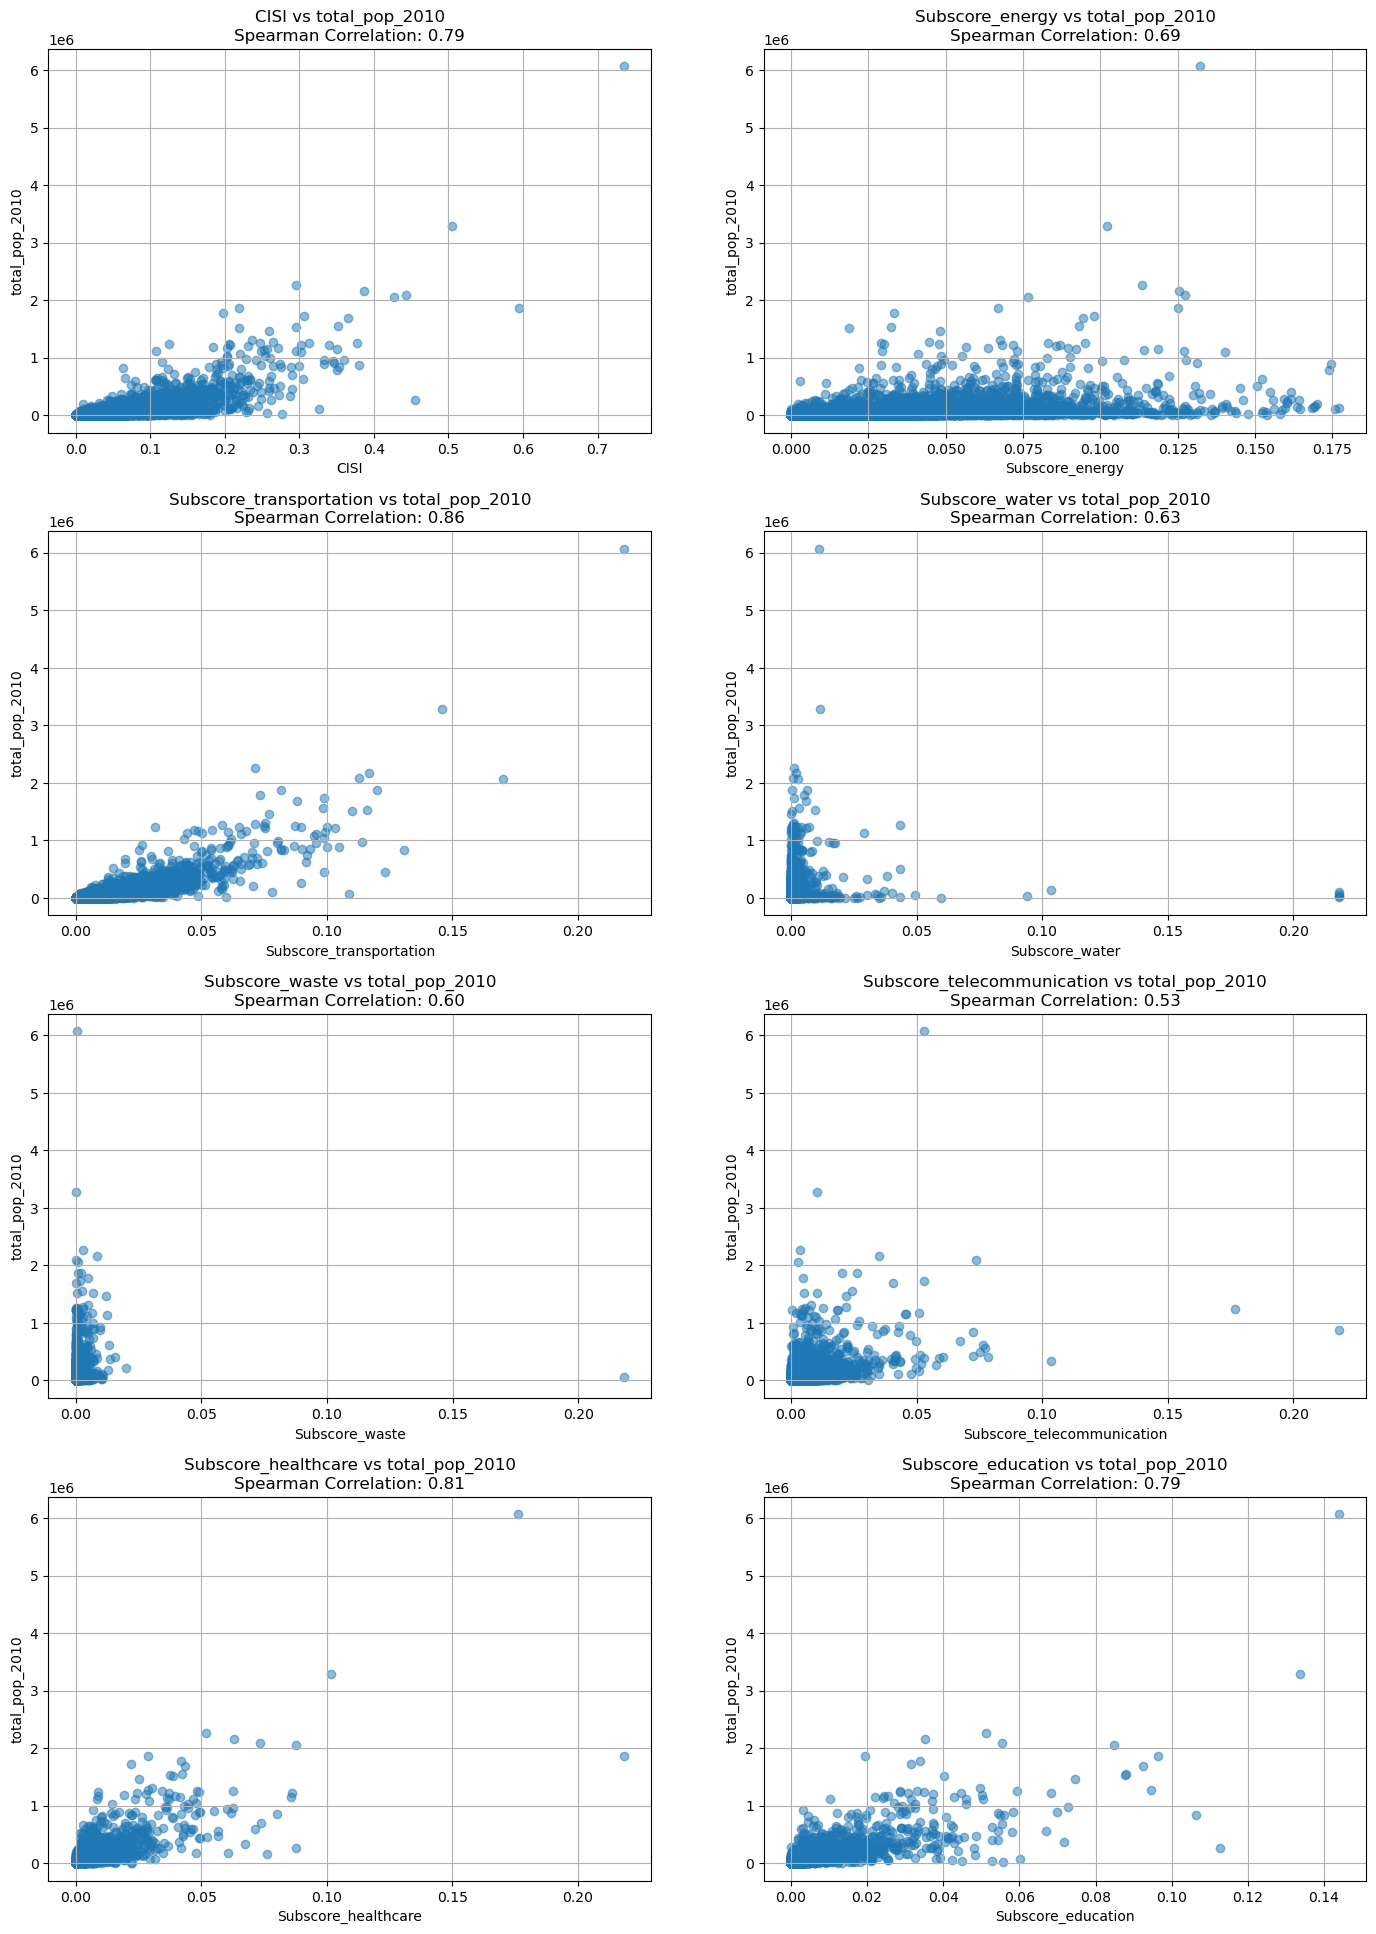

In [13]:
def plot_correlation_and_calculate_spearman(gdf, x_col, y_col, ax):
    # Calculate Spearman correlation
    correlation, p_value = spearmanr(gdf[x_col], gdf[y_col], nan_policy='omit')
    
    # Create scatter plot
    ax.scatter(gdf[x_col], gdf[y_col], alpha=0.5)
    ax.set_title(f'{x_col} vs {y_col}\nSpearman Correlation: {correlation:.2f}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)
    
    return correlation, p_value

# Assuming cisi_index_pop is a DataFrame with the necessary columns
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

CISI_correlation, CISI_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'CISI', 'total_pop_2010', axs[0, 0])
print(f'Spearman Correlation: {CISI_correlation:.2f}, P-value: {CISI_p_value:.2e}')

energy_correlation, energy_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_energy', 'total_pop_2010', axs[0, 1])
print(f'Spearman Correlation: {energy_correlation:.2f}, P-value: {energy_p_value:.2e}')

transportation_correlation, transportation_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_transportation', 'total_pop_2010', axs[1, 0])
print(f'Spearman Correlation: {transportation_correlation:.2f}, P-value: {transportation_p_value:.2e}')

water_correlation, water_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_water', 'total_pop_2010', axs[1, 1])
print(f'Spearman Correlation: {water_correlation:.2f}, P-value: {water_p_value:.2e}')

waste_correlation, waste_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_waste', 'total_pop_2010', axs[2, 0])
print(f'Spearman Correlation: {waste_correlation:.2f}, P-value: {waste_p_value:.2e}')

telecommunication_correlation, telecommunication_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_telecommunication', 'total_pop_2010', axs[2, 1])
print(f'Spearman Correlation: {telecommunication_correlation:.2f}, P-value: {telecommunication_p_value:.2e}')

healthcare_correlation, healthcare_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_healthcare', 'total_pop_2010', axs[3, 0])
print(f'Spearman Correlation: {healthcare_correlation:.2f}, P-value: {healthcare_p_value:.2e}')

education_correlation, education_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_education', 'total_pop_2010', axs[3, 1])
print(f'Spearman Correlation: {education_correlation:.2f}, P-value: {education_p_value:.2e}')

plt.show()

# Linear Regression Model

In [14]:
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [15]:
# Train test split for linear regression

columns = ['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
           'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare', 'Subscore_education']

# TODO: NA val on pop causes issue=> dont do fillna(0) but filter out the rows with NaN values
cisi_index_pop['total_pop_2010'] = cisi_index_pop['total_pop_2010'].fillna(0)

# # Only CISI
# X = cisi_index_pop['total_pop_2010'].values.reshape(-1, 1)
# y = cisi_index_pop['CISI'].values
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def split_data(df, feature_col, target_col, test_size=0.2, random_state=42):
    """
    Splits the DataFrame into training and testing sets based on the specified feature and target columns.

    Parameters:
    - df: pandas DataFrame
    - feature_col: str, name of the feature column
    - target_col: str, name of the target column
    - test_size: float, proportion of the dataset to include in the test split
    - random_state: int, random seed for reproducibility

    Returns:
    - X_train: training set features
    - X_test: testing set features
    - y_train: training set targets
    - y_test: testing set targets
    """
    X = df[feature_col].values.reshape(-1, 1)
    y = df[target_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Only CISI
X_train, X_test, y_train, y_test = split_data(cisi_index_pop, 'total_pop_2010', 'CISI')
# all the other subscores
X_train_energy, X_test_energy, y_train_energy, y_test_energy = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_energy')
X_train_transportation, X_test_transportation, y_train_transportation, y_test_transportation = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_transportation')
X_train_water, X_test_water, y_train_water, y_test_water = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_water')
X_train_waste, X_test_waste, y_train_waste, y_test_waste = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_waste')
X_train_telecommunication, X_test_telecommunication, y_train_telecommunication, y_test_telecommunication = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_telecommunication')
X_train_healthcare, X_test_healthcare, y_train_healthcare, y_test_healthcare = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_healthcare')
X_train_education, X_test_education, y_train_education, y_test_education = split_data(cisi_index_pop, 'total_pop_2010', 'Subscore_education')




In [41]:
# Only CISI
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)
linear_predictions = linear_model.predict(X_test)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_score = poly_model.score(X_test_poly, y_test)
poly_predictions = poly_model.predict(X_test_poly)

# function to perform the linear regression on all the data
def perform_linear_regression(X_train, X_test, y_train, y_test):
    """
    Performs linear regression on the training and testing sets and returns the model, score, and predictions.

    Parameters:
    - X_train: training set features
    - X_test: testing set features
    - y_train: training set targets
    - y_test: testing set targets

    Returns:
    - model: trained linear regression model
    - score: R^2 score of the model
    - predictions: model predictions on the testing set
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    return model, score, predictions


# Perform linear regression on all the data
linear_model_energy, linear_score_energy, linear_predictions_energy = perform_linear_regression(X_train_energy, X_test_energy, y_train_energy, y_test_energy)
linear_model_transportation, linear_score_transportation, linear_predictions_transportation = perform_linear_regression(X_train_transportation, X_test_transportation, y_train_transportation, y_test_transportation)
linear_model_water, linear_score_water, linear_predictions_water = perform_linear_regression(X_train_water, X_test_water, y_train_water, y_test_water)
linear_model_waste, linear_score_waste, linear_predictions_waste = perform_linear_regression(X_train_waste, X_test_waste, y_train_waste, y_test_waste)
linear_model_telecommunication, linear_score_telecommunication, linear_predictions_telecommunication = perform_linear_regression(X_train_telecommunication, X_test_telecommunication, y_train_telecommunication, y_test_telecommunication)
linear_model_healthcare, linear_score_healthcare, linear_predictions_healthcare = perform_linear_regression(X_train_healthcare, X_test_healthcare, y_train_healthcare, y_test_healthcare)
linear_model_education, linear_score_education, linear_predictions_education = perform_linear_regression(X_train_education, X_test_education, y_train_education, y_test_education)


In [40]:
# Calculate evaluation metrics

# for the linear
linear_rmse = np.sqrt(mean_absolute_error(y_test, linear_predictions))
linear_r2 = r2_score(y_test, linear_predictions)

#for the polynomial
poly_rmse = np.sqrt(mean_absolute_error(y_test, poly_predictions))
poly_r2 =r2_score(y_test, poly_predictions)

# Print the evaluation results
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

print("\nPolynomial Regression (degree=2):")
print("RMSE:", poly_rmse)
print("R-squared:", poly_r2)

# function to calculate the evaluation metrics
def calculate_and_print_evaluation_metrics(y_true, y_pred, model_name="Model"):
    """
    Calculates and prints evaluation metrics for regression models.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - model_name: str, name of the model (default is "Model")

    Returns:
    - rmse: float, root mean squared error
    - r2: float, R-squared score
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Regression:")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    return rmse, r2

linear_rmse, linear_r2 = calculate_and_print_evaluation_metrics(y_test, linear_predictions, "Linear")
linear_rmse_energy, linear_r2_energy = calculate_and_print_evaluation_metrics(y_test_energy, linear_predictions_energy, "Linear Energy")
linear_rmse_transportation, linear_r2_transportation = calculate_and_print_evaluation_metrics(y_test_transportation, linear_predictions_transportation, "Linear Transportation")
linear_rmse_water, linear_r2_water = calculate_and_print_evaluation_metrics(y_test_water, linear_predictions_water, "Linear Water")
linear_rmse_waste, linear_r2_waste = calculate_and_print_evaluation_metrics(y_test_waste, linear_predictions_waste, "Linear Waste")
linear_rmse_telecommunication, linear_r2_telecommunication = calculate_and_print_evaluation_metrics(y_test_telecommunication, linear_predictions_telecommunication, "Linear Telecommunication")
linear_rmse_healthcare, linear_r2_healthcare = calculate_and_print_evaluation_metrics(y_test_healthcare, linear_predictions_healthcare, "Linear Healthcare")
linear_rmse_education, linear_r2_education = calculate_and_print_evaluation_metrics(y_test_education, linear_predictions_education, "Linear Education")


Linear Regression:
RMSE: 0.14033741012491824
R-squared: 0.4212901527082954

Polynomial Regression (degree=2):
RMSE: 0.1395068741495724
R-squared: -8.395070176657526
Linear Regression:
RMSE: 0.03256444649041759
R-squared: 0.4212901527082954
Linear Energy Regression:
RMSE: 0.022590920702509728
R-squared: 0.03600155650505488
Linear Transportation Regression:
RMSE: 0.007553465953586651
R-squared: 0.5598113430765628
Linear Water Regression:
RMSE: 0.006156995628507346
R-squared: 0.0016256907145655308
Linear Waste Regression:
RMSE: 0.000729726488209173
R-squared: -0.00906883860235852
Linear Telecommunication Regression:
RMSE: 0.00507472296293094
R-squared: 0.23541520027159302
Linear Healthcare Regression:
RMSE: 0.002812457331311075
R-squared: 0.7560985293300577
Linear Education Regression:
RMSE: 0.0034228002912615532
R-squared: 0.6481529727756101


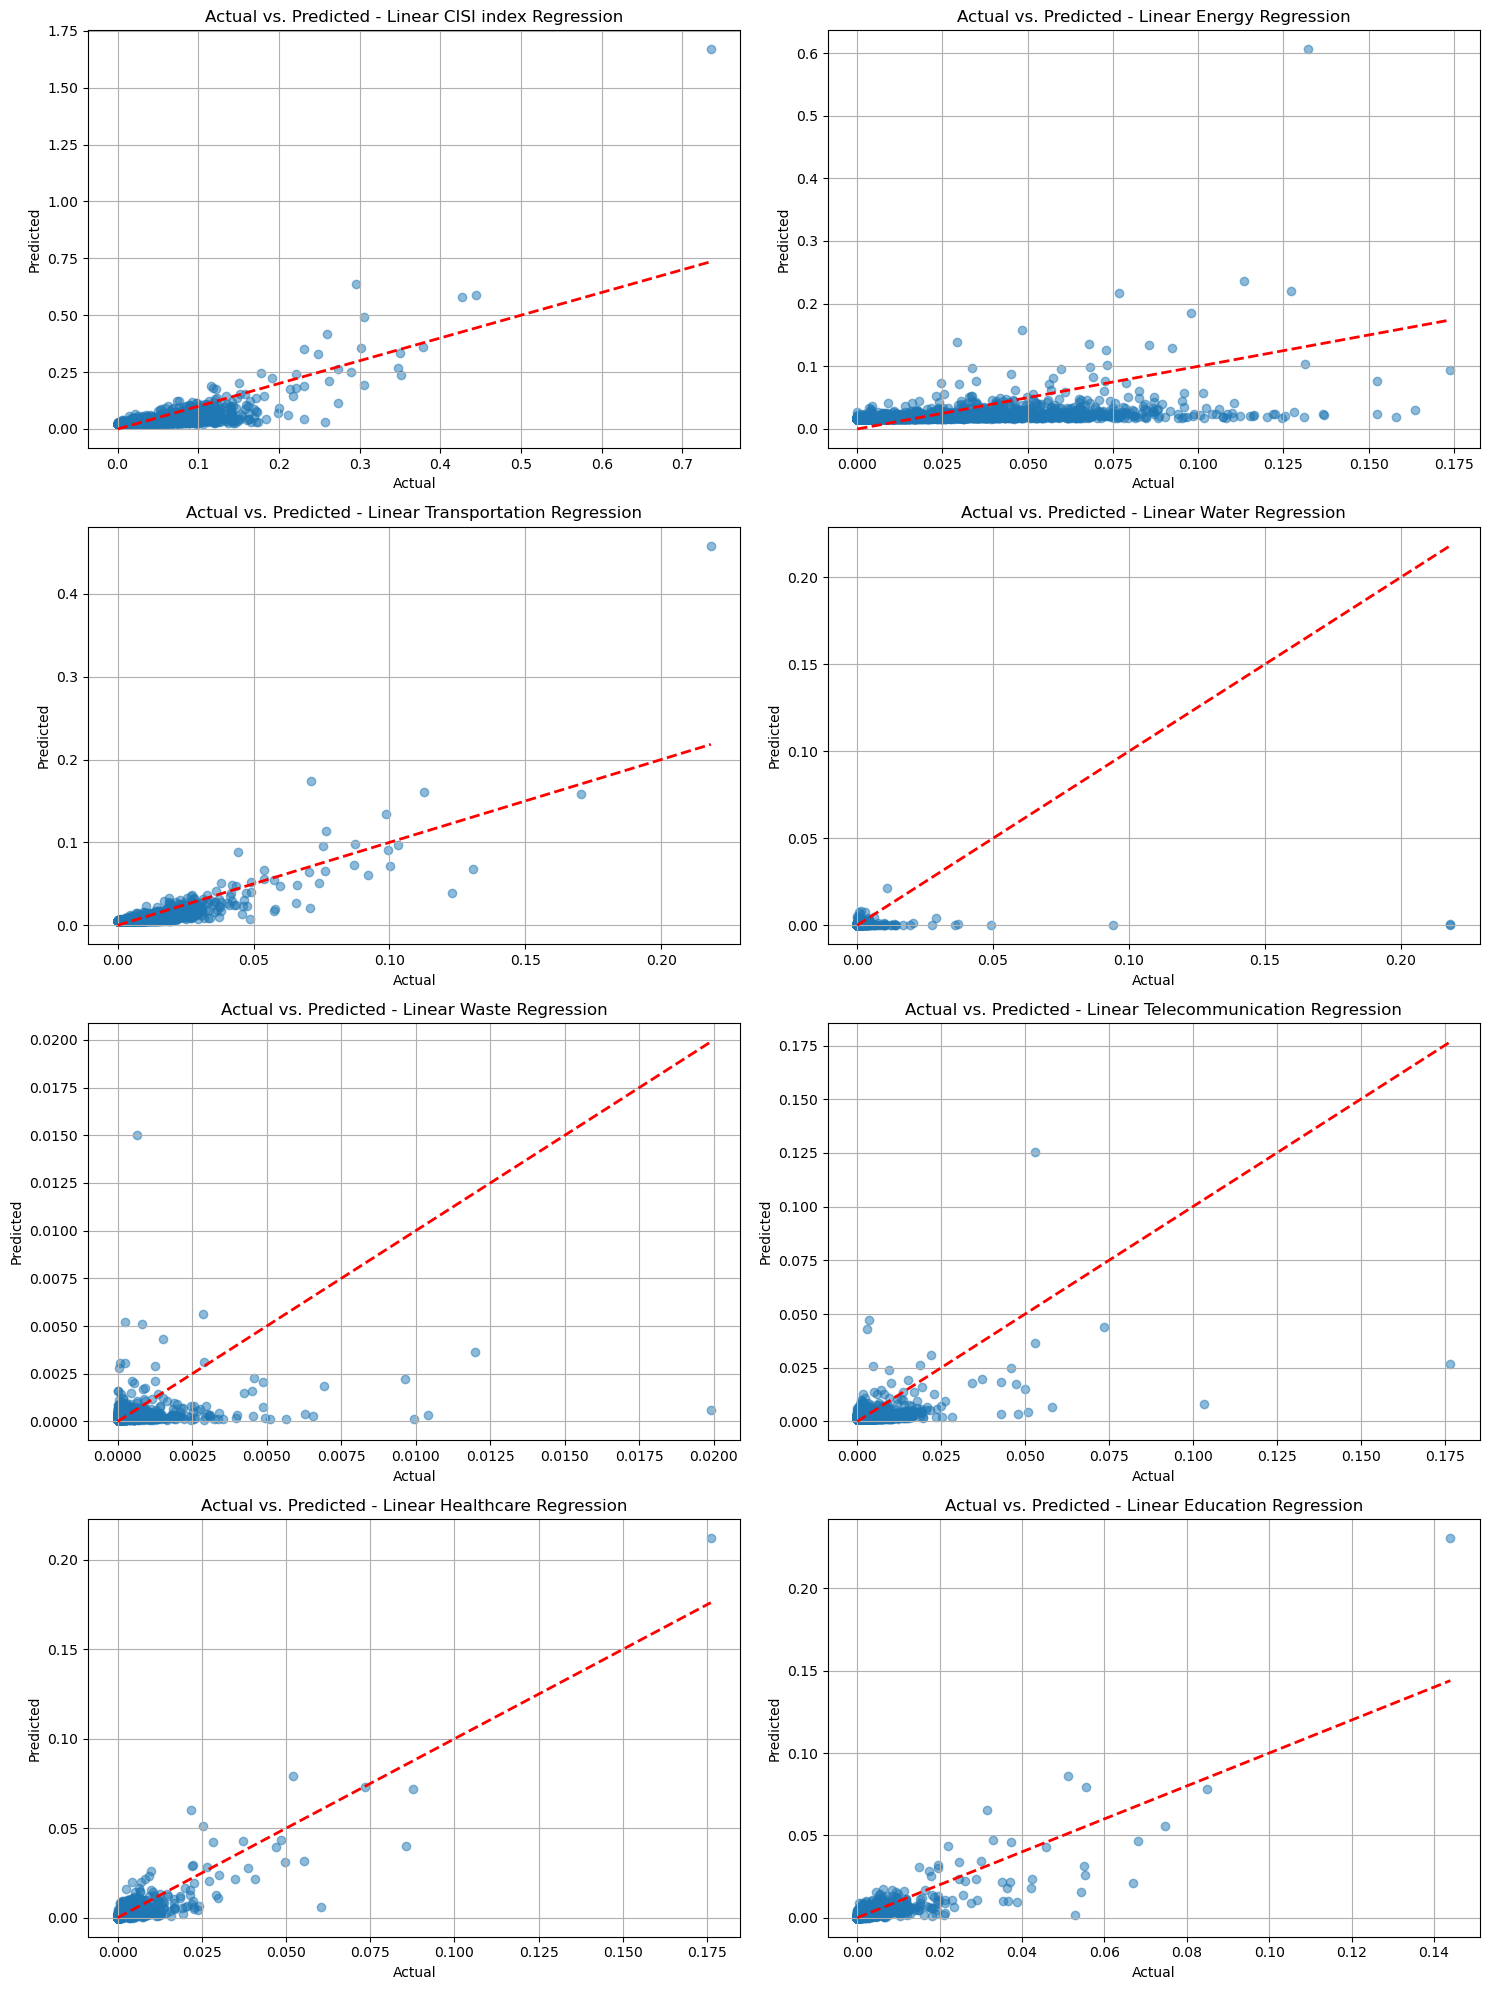

In [18]:
# #linear regression 
# plt.scatter(y_test, linear_predictions)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
# plt.title('Linear Regression - Actual vs Predicted')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.show()

import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_trues, y_preds, model_names):
    """
    Plots actual vs. predicted values for multiple regression models in a 2-column layout.

    Parameters:
    - y_trues: list of array-like, true target values for each model
    - y_preds: list of array-like, predicted target values for each model
    - model_names: list of str, names of the models
    """
    num_models = len(y_preds)
    num_rows = (num_models + 1) // 2  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, (y_true, y_pred, model_name) in enumerate(zip(y_trues, y_preds, model_names)):
        plt.subplot(num_rows, 2, i + 1)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Actual vs. Predicted - {model_name} Regression')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    

# Plot actual vs. predicted values for all the linear regression model
y_preds = [linear_predictions, linear_predictions_energy, linear_predictions_transportation, linear_predictions_water, linear_predictions_waste, linear_predictions_telecommunication, linear_predictions_healthcare, linear_predictions_education]
y_tests = [y_test, y_test_energy, y_test_transportation, y_test_water, y_test_waste, y_test_telecommunication, y_test_healthcare, y_test_education]
model_names = ["Linear CISI index", "Linear Energy", "Linear Transportation", "Linear Water", "Linear Waste", "Linear Telecommunication", "Linear Healthcare", "Linear Education"]

plot_actual_vs_predicted(y_tests, y_preds, model_names)

In [19]:
# Apply the linear model to the cisi_index_pop['total_pop_2100'] data and save as a new column
cisi_index_pop['total_pop_2100'] = cisi_index_pop['total_pop_2100'].fillna(0)
cisi_index_pop['CISI_predicted_2100'] = linear_model.predict(cisi_index_pop['total_pop_2100'].values.reshape(-1, 1))

In [20]:
cisi_index_pop.head(3)


,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry,total_pop_2010,total_pop_2100,CISI_predicted_2100
0,0.009069,0.000976,0.005474,3.729865e-07,0.000049,0.000352,0.001150,0.001067,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,52254.0,69253.0,0.041921
1,0.000032,0.000000,0.000032,0.000000e+00,0.000000,0.000000,0.000000,0.000000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,1158.0,1619.0,0.023582
2,0.025802,0.001302,0.017946,1.107409e-04,0.000017,0.003582,0.001391,0.001453,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,128933.0,148689.0,0.063460


<Axes: >

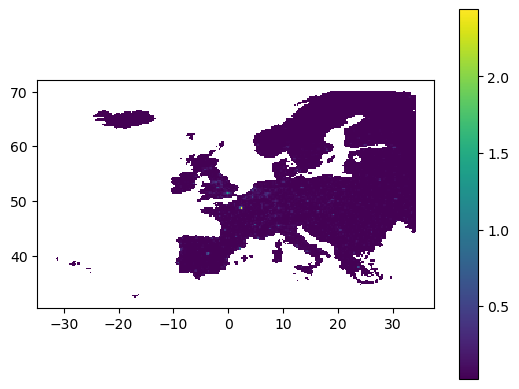

In [21]:

# convert to gdf and plot cisi_index_pop['CISI_predicted_2100']
cisi_index_pop.geometry = shapely.from_wkb(cisi_index_pop.geometry)
cisi_index_pop = gpd.GeoDataFrame(cisi_index_pop.copy())

#plot the gpd cisi_index_pop['CISI_predicted_2100']
cisi_index_pop.plot(column='CISI_predicted_2100', legend=True)

# Crossvalidation

In [22]:
# Only CISI index
X = cisi_index_pop['total_pop_2010'].values.reshape(-1, 1)
y = cisi_index_pop['CISI'].values

#X,y = datasets.make_regression()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Define the parameters for GridSearchCV
parameters = {'fit_intercept': [True, False]}
#clf = GridSearchCV(lr_model, parameters, refit=True, cv=5)
clf = GridSearchCV(lr_model, parameters, cv=3)
best_model = clf.fit(X,y)

Best Parameters: {'fit_intercept': False}
Best Score: 0.04168767257757966
R² Score: 0.17874349339631657
RMSE: 0.036759647865378796


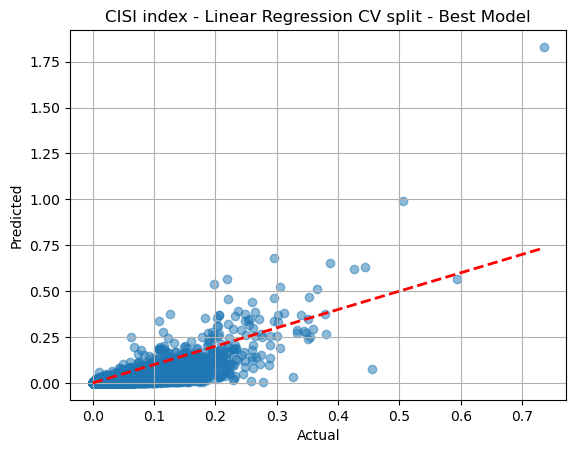

In [23]:
# Print the best parameters and the best score
print("Best Parameters:", best_model.best_params_)
print("Best Score:", best_model.best_score_)

# Make predictions using the best model
y_pred = best_model.predict(X)

# Calculate the R² score
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# #Plot the best model
# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, color='blue', label='Actual')
# plt.plot(X, y_pred, color='red', label='Predicted')
# plt.title('Linear Regression CV - Best Model')

plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CISI index - Linear Regression CV split - Best Model')
plt.grid(True)

# Outlier treatment


<Axes: >

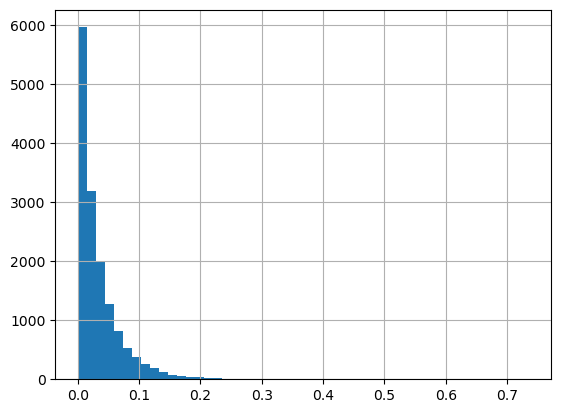

In [24]:
# plot disitribution of the cisi_index_pop['CISI']
cisi_index_pop['CISI'].hist(bins=50)

In [29]:
# Trim cis_index_pop['CISI'] to remove outliers with z-score > 2
# from scipy.stats import zscore
# z_scores = zscore(X)
# # Define a threshold for identifying outliers
# threshold = 1
# # Identify outliers
# outliers = (z_scores > threshold) | (z_scores < -threshold)
# cisi_index_pop['CISI_outliers'] = outliers
# # Filter out the outliers
# cisi_index_pop_trimmed = cisi_index_pop[~outliers]
# cisi_index_pop_trimmed['CISI'].hist(bins=50)
cisi_index_pop['quantile_cisi'] = pd.qcut(cisi_index_pop['CISI'], q=20, labels=False)
cisi_index_pop.head(20)
#filter out the outliers >90% quantile
cisi_index_pop_trimmed = cisi_index_pop[cisi_index_pop['quantile_cisi'] < 19]

<Axes: >

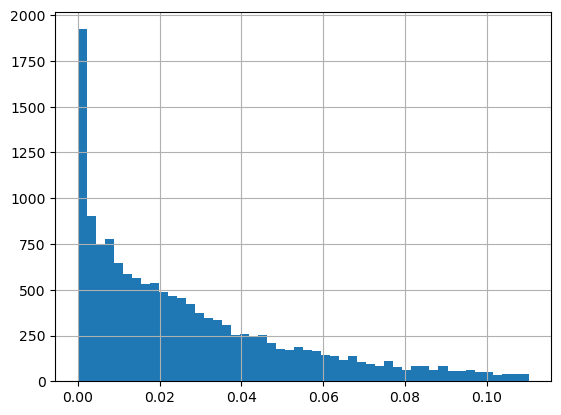

In [30]:
cisi_index_pop_trimmed['CISI'].hist(bins=50)

Spearman Correlation: 0.77, P-value: 0.00e+00


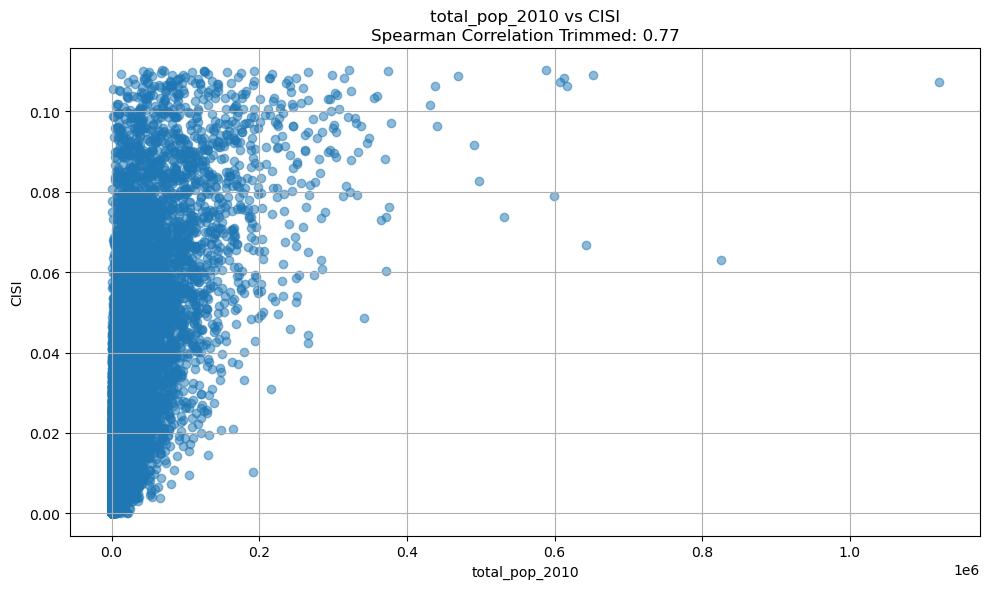

In [31]:
# Spearman correlation trimmed
spearmanr_cisi_trimmed = spearmanr(cisi_index_pop_trimmed['CISI'],cisi_index_pop_trimmed['total_pop_2010'],nan_policy='omit')
print(f'Spearman Correlation: {spearmanr_cisi_trimmed[0]:.2f}, P-value: {spearmanr_cisi_trimmed[1]:.2e}')


# Function to make scatter plot of the trimmed data
def plot_correlation_and_calculate_spearman_1graph(gdf, x_col, y_col, ax):
    # Calculate Spearman correlation
    correlation, p_value = spearmanr(gdf[x_col], gdf[y_col], nan_policy='omit')
    # Scatter plot
    ax.scatter(gdf[x_col], gdf[y_col], alpha=0.5)
    ax.set_title(f'{x_col} vs {y_col}\nSpearman Correlation Trimmed: {correlation:.2f}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)
    return correlation, p_value

# Example usage
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

CISI_correlation_trimmed, CISI_p_value_trimmed = plot_correlation_and_calculate_spearman_1graph(cisi_index_pop_trimmed, 'total_pop_2010','CISI', axs)

plt.tight_layout()
plt.show()

# Sigmoid CISI

/var/folders/0n/dhghwnr10818sldm15nkjl4r0000gn/T/ipykernel_52387/2705798953.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k * (x - x0))) + b


Optimal parameters: [ 2.19156799e+02 -2.61609531e+06  2.60205020e-06 -2.18898996e+02]


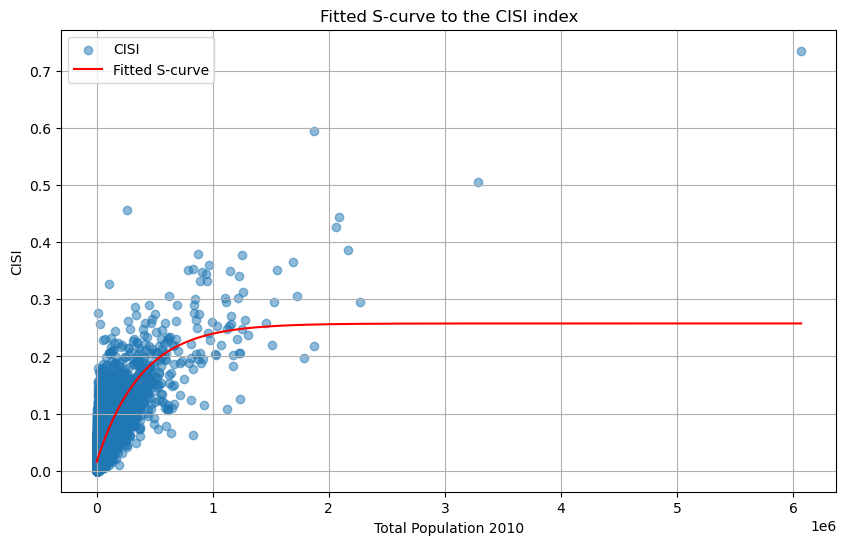

In [77]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Assuming cisi_index_pop_trimmed is already defined and contains the necessary columns
X = cisi_index_pop['total_pop_2010'].values
y = cisi_index_pop['CISI'].values

# Define the sigmoid function
def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return y

# Initial guess for the parameters
p0 = [max(y), np.median(X), 1, min(y)]

# # Define bounds for the parameters
# bounds = (
#     [0.3, min(X), 0, 0],  # Lower bounds for L, x0, k, b
#     [1, max(X), 20, max(y)]  # Upper bounds for L, x0, k, b
# )

# Fit the sigmoid function to the data with increased maxfev
popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox', maxfev=30000)

# Print the optimal parameters
print("Optimal parameters:", popt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='CISI', alpha=0.5)
x_fit = np.linspace(min(X), max(X), 1000)
y_fit = sigmoid(x_fit, *popt)
plt.plot(x_fit, y_fit, label='Fitted S-curve', color='red')
plt.xlabel('Total Population 2010')
plt.ylabel('CISI')
plt.title('Fitted S-curve to the CISI index')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/0n/dhghwnr10818sldm15nkjl4r0000gn/T/ipykernel_52387/3597480944.py:9: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k * (x - x0))) + b
/var/folders/0n/dhghwnr10818sldm15nkjl4r0000gn/T/ipykernel_52387/3597480944.py:9: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k * (x - x0))) + b
/var/folders/0n/dhghwnr10818sldm15nkjl4r0000gn/T/ipykernel_52387/3597480944.py:9: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k * (x - x0))) + b


Cross-validation R² scores: [0.5249225902697817, 0.27461200747548875, 0.578605466382513]
Mean R² score: 0.4593800213759278
Cross-validation RMSE scores: [0.02775942420154642, 0.03410823220217719, 0.02684517270520989]
Mean RMSE score: 0.029570943036311165


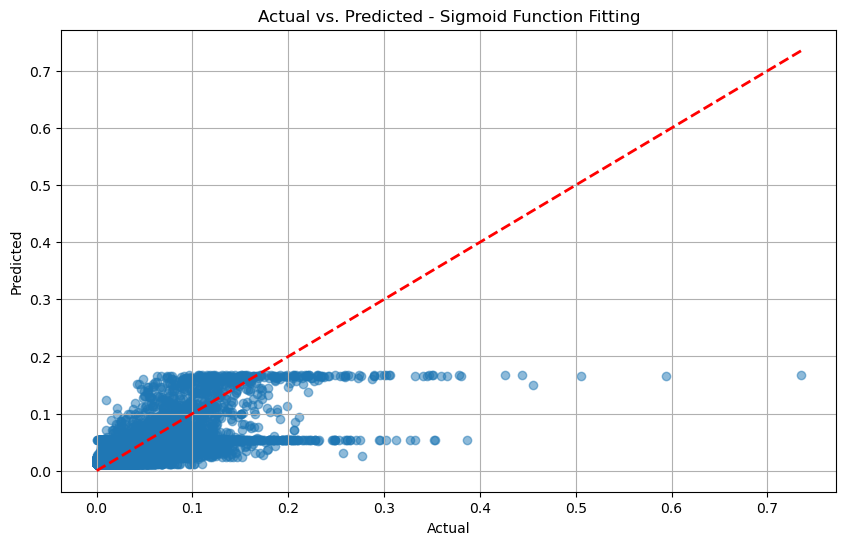

In [79]:
from sklearn.model_selection import KFold

# Assuming cisi_index_pop_trimmed is already defined and contains the necessary columns
X = cisi_index_pop['total_pop_2010'].values
y = cisi_index_pop['CISI'].values

# Define the sigmoid function
def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return y

# Initial guess for the parameters
p0 = [max(y), np.median(X), 1, min(y)]

# Define bounds for the parameters
bounds = (
    [0, min(X), 0, 0],  # Lower bounds for L, x0, k, b
    [max(y) * 2, max(X), 10, max(y)]  # Upper bounds for L, x0, k, b
)

# Implement cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
r2_scores = []
rmse_scores = []
y_actual = []
y_predicted = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the sigmoid function to the training data
    popt, pcov = curve_fit(sigmoid, X_train, y_train, p0, method='dogbox', maxfev=30000, bounds=bounds)
    
    # Predict on the test data
    y_test_pred = sigmoid(X_test, *popt)
    
    # Compute R² and RMSE
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    
    y_actual.extend(y_test)
    y_predicted.extend(y_test_pred)

# Print the cross-validation results
print("Cross-validation R² scores:", r2_scores)
print("Mean R² score:", np.mean(r2_scores))
print("Cross-validation RMSE scores:", rmse_scores)
print("Mean RMSE score:", np.mean(rmse_scores))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_predicted, alpha=0.5)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Sigmoid Function Fitting')
plt.grid(True)
plt.show()

In [ ]:
# Define the sigmoid function
def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return y

# Initial guess for the parameters
p0 = [max(y), np.median(X), 1, min(y)]

# Define bounds for the parameters
bounds = (
    [0, min(X), 0, 0],  # Lower bounds for L, x0, k, b
    [max(y) * 2, max(X), 10, max(y)]  # Upper bounds for L, x0, k, b
)

# Implement cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
r2_scores = []
rmse_scores = []
y_actual = []
y_predicted = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the sigmoid function to the training data
    popt, pcov = curve_fit(sigmoid, X_train, y_train, p0, method='dogbox', maxfev=30000, bounds=bounds)
    
    # Predict on the test data
    y_test_pred = sigmoid(X_test, *popt)
    
    # Compute R² and RMSE
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    
    y_actual.extend(y_test)
    y_predicted.extend(y_test_pred)

# Print the cross-validation results
print("Cross-validation R² scores:", r2_scores)
print("Mean R² score:", np.mean(r2_scores))
print("Cross-validation RMSE scores:", rmse_scores)
print("Mean RMSE score:", np.mean(rmse_scores))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_predicted, alpha=0.5)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Sigmoid Function Fitting')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Fitted Negative Exponential to the CISI index')

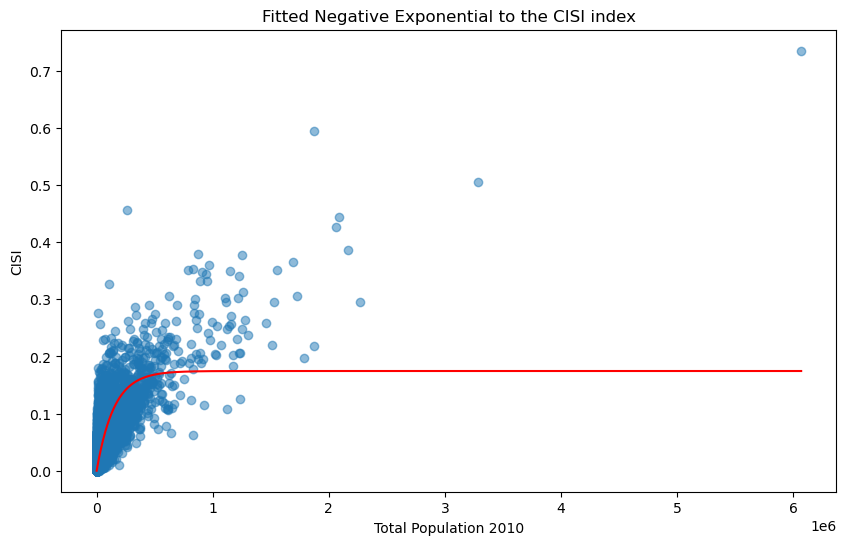

In [98]:
def negative_exponential(x, b, k):
    return b * (1 - np.exp(-k * x))


offset = 0
## fit
res, pcov = curve_fit(
    f=negative_exponential,
    xdata=X,
    ydata=y,
    p0=[0, 1],  # the asymptote guess is 200 and the rate guess is 1e-3
    maxfev=30000,
    bounds = (0, [np.inf, 3]),  # adding constraints
)
b, k = res

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='CISI', alpha=0.5)
x_fit = np.linspace(min(X), max(X), 1000)
y_fit = negative_exponential(x_fit, b, k)
plt.plot(x_fit, y_fit, label='Fitted Negative Exponential', color='red')
plt.xlabel('Total Population 2010')
plt.ylabel('CISI')
plt.title('Fitted Negative Exponential to the CISI index')